# **Covid-19 Analysis in India**

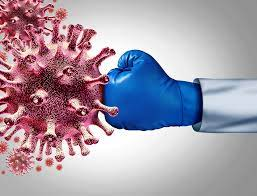

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Data loading**

In [ ]:
# Loading the covid-19 india date-wise record
df=pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
state_testing = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')
df_vc = pd.read_csv('../input/covid19-in-india/covid_vaccine_statewise.csv')

In [ ]:
# Overviewing the data before modifications
df.head()

In [ ]:
df.info()

In [ ]:
# Checking for any null values
df.isnull().sum()

In [ ]:
# Dropping the columns which are not going to be used

df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [ ]:
#finding the active cases

df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df.head()

In [ ]:
df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce')
df['Confirmed']=df['Confirmed'].fillna(0)
df['Confirmed']=df['Confirmed'].astype('int')

df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Deaths']=df['Deaths'].fillna(0)
df['Deaths']=df['Deaths'].astype('int')

df['Cured'] = pd.to_numeric(df['Cured'], errors='coerce')
df['Cured']=df['Cured'].fillna(0)
df['Cured']=df['Cured'].astype('int')

df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Deaths']=df['Deaths'].fillna(0)
df['Deaths']=df['Deaths'].astype('int')

df['Cured'] = pd.to_numeric(df['Cured'], errors='coerce')
df['Cured']=df['Cured'].fillna(0)
df['Cured']=df['Cured'].astype('int')

# State wise Analysis

In [ ]:
statewise = pd.pivot_table(df, values=['Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
statewise['Recovery Rate'] = statewise['Cured']*100 / statewise['Confirmed']
statewise['Mortality Rate'] = statewise['Deaths']*100 /statewise['Confirmed']
statewise = statewise.sort_values(by='Confirmed', ascending= False)
statewise.style.background_gradient(cmap='YlOrRd')

It's no brainer that Maharshtra tops this list in all aspect

Considering the number of cases Punjab has done a great job when it comes to recovery rate

Similarly in terms of mortality rate West Bengal and Gujarat seem to have higher numbers

Tamilnadu, Maharshtra, Andhra Pradesh and Rajastan respectively had ramped up their testing capabilities

Though being second in the country w.r.t. total confirmed cases Tamilnadu seem to have established the healthcare facility to a higher level which is evident from the lower mortality rate (0.6%)

In [ ]:
# Data Cleaning
state_testing['TotalSamples']=state_testing['TotalSamples'].fillna(0)
state_testing['TotalSamples']=state_testing['TotalSamples'].astype('int')
state_testing['Positive']=state_testing['Positive'].fillna(0)
state_testing['Positive']=state_testing['Positive'].astype('int')
state_testing['Negative']=state_testing['Negative'].fillna(0)
#state_testing['Negative']=state_testing['Negative'].astype('int')

In [ ]:
statewise_testing = pd.pivot_table(state_testing, values=['TotalSamples','Positive','Negative'], index='State', aggfunc='max')
statewise_testing['Positive_Case_Rate'] = statewise_testing['Positive']*100 / statewise_testing['TotalSamples']
statewise_testing['Positive_Case_Rate']=round(statewise_testing['Positive_Case_Rate'].astype('int'),2)
statewise_testing = statewise_testing.sort_values(by='TotalSamples', ascending= False)
statewise_testing.style.background_gradient(cmap='YlOrRd')

# Visualizations

In [ ]:
# Data Visualization Liraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import display, Markdown

In [ ]:
testing=state_testing.groupby('State')['TotalSamples'].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation='h',
             height=800,
             title='Statewise Testing',
            color='State')
fig.show()

In [ ]:
plt.figure(figsize = (18,10))
figure = px.line(df, x='Date', y='Confirmed', color='State/UnionTerritory')
figure.update_xaxes(rangeslider_visible=True)
pyo.iplot(figure)

Above data shows Maharastra has more number of active cases.

In [ ]:
# Adding Location data (Latitude,Longitude)
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]    
}
statewise["Lat"] = ""
statewise["Long"] = ""

for index in statewise.index :
    if index in locations:
        statewise.loc[statewise.index == index,"Lat"] = locations[index][0]
        statewise.loc[statewise.index == index,"Long"] = locations[index][1]
    else:
        statewise.drop([index],inplace=True)

In [ ]:
import folium  
from IPython.display import HTML, display
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=4,height=500,width="80%")
for i in range(0,len(statewise[statewise['Confirmed']>0].index)):
    folium.Circle(
        location=[statewise.iloc[i]['Lat'], statewise.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+statewise.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(statewise.iloc[i]['Confirmed'])+"</li>"+
        "<li>Cured:   "+str(statewise.iloc[i]['Cured'])+"</li>"+
        "<li>Deaths:   "+str(statewise.iloc[i]['Deaths'])+"</li>"+
        "<li>Recovery Rate:   "+str(np.round(statewise.iloc[i]['Recovery Rate'],2))+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(statewise.iloc[i]['Mortality Rate'],2))+"</li>"+
        "</ul>"
        ,
        radius=(int(np.log2(statewise.iloc[i]['Confirmed']+1)))*15000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(india)

india

In [ ]:
df1=df.groupby('Date')[['Cured','Deaths','Confirmed']].sum()

In [ ]:
df1.tail()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df1["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df1.index, y=df1["Cured"],
                    mode='lines+markers',
                    name='Cured Cases'))
fig.add_trace(go.Scatter(x=df1.index, y=df1["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=df1.index, y=(df1["Cured"]/df1["Confirmed"])*100,
              name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df1.index, y=(df1["Deaths"]/df1["Confirmed"])*100,
              name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100

Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100

Recovery Rate was initially very high when the number of positive (Confirmed) cases were low and showed a drastic drop with increasing number of cases. Increasing Mortality rate and dropped Recovery Rate is worrying sign for India.

Increasing Mortality Rate and very slowly increasing Recovery Rate is conclusive evidence for increase in number of Closed Cases

Recovery Rate is showing an upward trend which is a really good sign. Mortality Rate is showing a slight dips but with occasional upward trends.

In [ ]:
growth_diff = []

for i in range(1,len(df1['Confirmed'])):
    growth_diff.append(df1['Confirmed'][i] / df1['Confirmed'][i-1])

growth_factor = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_factor)

In [ ]:
df1.reset_index(inplace=True)
df1.head()

In [ ]:
prediction_dates = []
from datetime import datetime,timedelta
df1['Date']=pd.to_datetime(df1['Date'], format='%Y-%m-%d')
start_date = df1['Date'][len(df1['Date']) - 1]
for i in range(90):
    date = start_date +timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
previous_day_cases = df1['Confirmed'][len(df1['Date']) - 1]
predicted_cases = []

for i in range(90):
    predicted_value = previous_day_cases *  growth_factor
    predicted_cases.append(predicted_value)
    previous_day_cases = predicted_value

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 90 Days" , fontsize = 20)
ax1 = plt.plot_date(y= predicted_cases,x= prediction_dates,linestyle ='-',color = 'c')

We could see that the graph is increasing exponentialy if the average growth factor doesn't decrease. It is important that the growth factor is reduced to flatten the curve.

# Effect of Lockdown

On 24 March 2020, PM Narendra Modi announced a complete nationwide lockdown

* No lockdown= 2020-01-30 to 2020-03-24
* lockdown 1= 2020-03-24 to 2020-07-15
* Lockdown_2= 2020-07-15 to 2020-11-04
* Lockdown_3= 2020-11-04 to 2021-02-19
* Lockdown_4= 2021-02-19 to 2021-05-31
* Unlock_1= 2020-06-01 to 2020-06-30
* Unlock_2= 2020-07-01 to present

In [ ]:
No_Lockdown=df1[df1["Date"]<pd.to_datetime("2020-03-24")]
Lockdown_1=df1[(df1["Date"]>=pd.to_datetime("2020-03-24"))&(df1["Date"]<pd.to_datetime("2020-07-15"))]
Lockdown_2=df1[(df1["Date"]>=pd.to_datetime("2020-07-15"))&(df1["Date"]<pd.to_datetime("2020-11-04"))]
Lockdown_3=df1[(df1["Date"]>=pd.to_datetime("2020-11-04"))&(df1["Date"]<pd.to_datetime("2021-02-19"))]
Lockdown_4=df1[(df1["Date"]>=pd.to_datetime("2021-02-19"))&(df1["Date"]<=pd.to_datetime("2021-05-31"))]
Unlock_1=df1[(df1["Date"]>=pd.to_datetime("2020-06-01"))&(df1["Date"]<=pd.to_datetime("2020-06-30"))]
Unlock_2=df1[(df1["Date"]>=pd.to_datetime("2020-07-01"))]

No_Lockdown_datewise=No_Lockdown.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_1_datewise=Lockdown_1.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_2_datewise=Lockdown_2.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_3_datewise=Lockdown_3.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_4_datewise=Lockdown_4.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Unlock_1_datewise=Unlock_1.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Unlock_2_datewise=Unlock_2.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})

No_Lockdown_datewise["Active Cases"]=No_Lockdown_datewise["Confirmed"]-No_Lockdown_datewise["Cured"]-No_Lockdown_datewise["Deaths"]
Lockdown_1_datewise["Active Cases"]=Lockdown_1_datewise["Confirmed"]-Lockdown_1_datewise["Cured"]-Lockdown_1_datewise["Deaths"]
Lockdown_2_datewise["Active Cases"]=Lockdown_2_datewise["Confirmed"]-Lockdown_2_datewise["Cured"]-Lockdown_2_datewise["Deaths"]
Lockdown_3_datewise["Active Cases"]=Lockdown_3_datewise["Confirmed"]-Lockdown_3_datewise["Cured"]-Lockdown_3_datewise["Deaths"]
Lockdown_4_datewise["Active Cases"]=Lockdown_4_datewise["Confirmed"]-Lockdown_4_datewise["Cured"]-Lockdown_4_datewise["Deaths"]
Unlock_1_datewise["Active Cases"]=Unlock_1_datewise["Confirmed"]-Unlock_1_datewise["Cured"]-Unlock_1_datewise["Deaths"]
Unlock_2_datewise["Active Cases"]=Unlock_2_datewise["Confirmed"]-Unlock_2_datewise["Cured"]-Unlock_2_datewise["Deaths"]

No_Lockdown_datewise["Days Since"]=(No_Lockdown_datewise.index-No_Lockdown_datewise.index.min()).days
Lockdown_1_datewise["Days Since"]=(Lockdown_1_datewise.index-Lockdown_1_datewise.index.min()).days
Lockdown_2_datewise["Days Since"]=(Lockdown_2_datewise.index-Lockdown_2_datewise.index.min()).days
Lockdown_3_datewise["Days Since"]=(Lockdown_3_datewise.index-Lockdown_3_datewise.index.min()).days
Lockdown_4_datewise["Days Since"]=(Lockdown_4_datewise.index-Lockdown_4_datewise.index.min()).days
Unlock_1_datewise["Days Since"]=(Unlock_1_datewise.index-Unlock_1_datewise.index.min()).days
Unlock_2_datewise["Days Since"]=(Unlock_2_datewise.index-Unlock_2_datewise.index.min()).days

print("Average Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).median())

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(y=list(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 1.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 2.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 3.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 4.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Unlock 1.0 Active Cases'))
# fig.add_trace(go.Scatter(y=list(Unlock_2_datewise["Active Cases"]/Unlock_2_datewise["Active Cases"].shift()),
#                     mode='lines+markers',
#                     name='Growth Factor of Unlock 2.0 Active Cases'))
fig.update_layout(title="Lockdownwise Growth Factor of Active Cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=(dict(x=0,y=1,traceorder="normal")))
fig.show()

All Lockdowns seems to have shown a slight effect of the Growth Rate of Active Cases implying the COVID-19 controlling practices are working well.

The Growth rate of Active Cases has slowed down during each Lockdown.

Growth of Active Cases is showing a decreasing trend in Lockdown 3.0, probably because Lockdown 3.0 is much more lenient as compared to previous Lockdown versions

# Prediction

Fitting data into a Logistic Curve/Sigmoid equation: y=(L1/1+e−k(x−x0))+1

In [ ]:
predIndiaDF = df1.copy()
extended_period = 2000
from scipy.optimize import curve_fit
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0))) + 1

popt, pcov = curve_fit(sigmoid,  (predIndiaDF.index+1).astype(float), predIndiaDF['Confirmed'],  p0=(0,0,0),maxfev=5000 )

x0 = int(popt[2]/10)
print('\033[1mx0 (point/day of inflexion):\033[0m',int(popt[2]/10))
print('\033[1mL (Maximum no.of cases):\033[0m',int(popt[0]/10000) )
print('\033[1mk (Growth Rate):\033[0m',round(float(popt[1]),2) )
print('\033[1mPCOV: \033[0m\n',pcov )

fig = go.Figure()
dateRange = pd.date_range(pd.to_datetime(predIndiaDF['Date'].min()),\
                                         pd.to_datetime(predIndiaDF['Date'].min())+pd.DateOffset(extended_period))

fig.add_trace(go.Scatter(x = predIndiaDF['Date'],
                         y = predIndiaDF['Confirmed'],
                         mode = 'lines',
                         name = 'Observed'))
fig.add_trace(go.Scatter(x = dateRange[:600],
                         y = sigmoid([x for x in range(extended_period)],*popt),
                         mode = 'lines',
                         name = 'Predicted'))
fig.add_trace(go.Scatter(x = [dateRange[x0], dateRange[x0]],
                         y = [0,  sigmoid([x for x in range(extended_period)],*popt)[x0]],
                         name = 'X0 - Inflexion point',
                         mode = 'lines'))

fig.update_layout(template='plotly_dark',title='Projected Confirmed Cases')
fig.show()

**Facebook's Prophet Model Prediction**

In [ ]:
from fbprophet import Prophet
fb_data = df1.copy()
fb_confirm = fb_data[['Date', 'Confirmed']]
fb_confirm = fb_confirm.rename(columns={'Date': 'ds',
                        'Confirmed': 'y'})

fb_confirm.head()

In [ ]:
# Time Series Forecasting with Prophet
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)
my_model.fit(fb_confirm)

In [ ]:
# Creating a new dataframe
# Prophet provides the make_future_dataframe helper function
future_dates = my_model.make_future_dataframe(periods=15, freq='MS')
future_dates.tail()

In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

* ds: the datestamp of the forecasted value
* yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
* yhat_lower: the lower bound of our forecasts
* yhat_upper: the upper bound of our forecasts

In [ ]:
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
fig = plot_plotly(my_model, forecast)
pyo.iplot(fig) 

fig = my_model.plot(forecast,xlabel='Date',ylabel='Confirmed Count')

In [ ]:
forecast_components=my_model.plot_components(forecast)

The infection trend is exponential and evident india has not yet reached the peak point

Towards weekend and beginning of the week the confirmed cases rate seem to be high

Movement of people during weekend and week beginning. This could contribute this rise

Social distancing not followed in some parts of the country as evident from various web sources and news channels

In [ ]:
fb_death = fb_data[['Date', 'Deaths']]
fb_death = fb_death.rename(columns={'Date': 'ds',
                        'Deaths': 'y'})

m = Prophet()
m.fit(fb_death)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                    mode='lines+markers',name='Predicted Cases',marker_color='red'))
fig.add_trace(go.Scatter(x=fb_death['ds'], y=fb_death['y'],
                    mode='lines+markers',name='Actual Cases',marker_color='blue'))
fig.update_layout(
    title='Forecasting of Deaths in INDIA for Next 30 Days')
fig.show()

In [ ]:
fb_Cured = fb_data[['Date', 'Cured']]
fb_Cured = fb_death.rename(columns={'Date': 'ds',
                        'Cured': 'y'})

m = Prophet()
m.fit(fb_Cured)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                    mode='lines+markers',name='Predicted Cases',marker_color='green'))
fig.add_trace(go.Scatter(x=fb_Cured['ds'], y=fb_Cured['y'],
                    mode='lines+markers',name='Actual Cases',marker_color='yellow'))
fig.update_layout(
    title='Forecasting of Cured in INDIA for Next 30 Days')
fig.show()

SARIMAX MODEL

In [ ]:
# test size
test_size = 30
train_size= len(df1) - test_size
train = df1[['Confirmed']].iloc[:train_size]
test = df1[['Confirmed']].iloc[train_size:]
# train and test

print(train.shape)
print(test.shape)

In [ ]:
# exons variables
exons=df1[['Cured','Deaths']]

full_data = df1['Confirmed']

In [ ]:
import statsmodels.api as sm
SARIMAX__model = sm.tsa.statespace.SARIMAX(full_data.values,exons=exons,
                                            order=(1,0,1),
                                            seasonal_order=(1,0,1,7),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False,)
SARIMAX__model = SARIMAX__model.fit(maxiter=1000)

days=60
prediction = SARIMAX__model.get_forecast(steps=days)
pred_date = prediction.summary_frame(alpha=0.05).set_index(pd.date_range(start='2021-07-07',periods=days,freq='D'))

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Actual",
     x=df1['Date'], y=df1["Confirmed"]))

fig.add_trace(go.Scatter(
    name="prediction",mode="lines",
     x=pred_date.index, y=pred_date['mean']))

fig.add_trace(go.Scatter(
    name="lowerbound",mode="lines",
        line=dict(width=0),fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',showlegend=False,
     x=pred_date.index, y=pred_date['mean_ci_lower']))

fig.add_trace(go.Scatter(name="upperbound",mode="lines",
        line=dict(width=0),fillcolor='rgba(68, 68, 68, 0.3)',fill='tonexty',showlegend=False,
                         x=pred_date.index, y=pred_date['mean_ci_upper']))

# State wise prediction

In [ ]:
Telangana_test=state_testing[(state_testing['State']=='Telangana')]
plt.figure(figsize=(8,8))
plt.plot(Telangana_test['Date'],Telangana_test['TotalSamples'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Total Samples')
plt.title('Dates V/S Total Samples')
ax.annotate('Lockdown 2', xy =('2020-07-15', 21994), xytext=('2020-07-15',150000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('2020-11-04',162970), xytext=('2020-11-04',5000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('2021-03-18',337841), xytext=('2021-03-18',185000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('2021-06-08',607952), xytext=('2021-06-08',200000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 

In [ ]:
states=['Kerala', 'Telengana', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Andhra Pradesh']
from datetime import datetime,timedelta
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
fig = plt.figure(figsize=(25,20),dpi = 250)
subplotno = 1

for state in states:
    
     
    state_df = df[df['State/UnionTerritory'] == state]
    y = state_df['Confirmed']
    
    arima = ARIMA(y, order=(5, 2, 0))
    arima = arima.fit(trend='c', full_output=True, disp=True)
    forecast = arima.forecast(steps= 6)
    pred = list(forecast[0])

    start_date = state_df['Date'].max()

    prediction_dates = [pd.to_datetime(start_date)]

    for i in range(5):
        
        tempdate = start_date + timedelta(days=1)
        prediction_dates.append(tempdate)
        start_date = tempdate
    
    ax = fig.add_subplot(3,2,subplotno)
    
    plt.title(state + ' : ' + str(int(round(pred[-1],0))) + ' Cases' , fontsize = 16)


    plt.xticks(fontsize = 8)
    
    sns.lineplot(y= pred,x= prediction_dates,linestyle ='dashed',label = 'Predicted',color = 'red')
    sns.lineplot(y=state_df['Confirmed'] , x = state_df['Date'] ,color = 'darkcyan',label = 'Actual')
    plt.legend()
    

    plt.ylabel('')
    plt.xlabel('')

    subplotno +=1

plt.suptitle('State-wise Predicted Number of Cases by '+str(prediction_dates[-1].date()) ,fontsize = 23)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Statepred - ARIMA')

Will 3rd wave hit India?

It's frightening to see what may come to be. But ,it is quite possible to flatten the curve in the next few months.

We should follow the protocols and get vaccinated as soon as possible.

# Vaccination Progress

In [ ]:
vc_pro =df_vc.groupby('State')['Total Individuals Vaccinated'].max().reset_index().sort_values(['Total Individuals Vaccinated'],ascending=False)
vc_pro

**Andhra Pradesh**

Population = 54.6 Million

In [ ]:
andhra = df_vc[df_vc["State"]=="Andhra Pradesh"] 
andhra.head()

In [ ]:
fig = px.line(andhra,x="Updated On",y="Total Individuals Vaccinated",title="Total Individuals Vaccinated from day to day")  
fig.update_xaxes(rangeslider_visible=True) 

In [ ]:
fig = px.line(andhra,x="Updated On",y="Total Sessions Conducted",title="Total Number of sessions are conducted from day to day")  
fig.update_xaxes(rangeslider_visible=True) 

In [ ]:
male = andhra["Male(Individuals Vaccinated)"].sum() 
female = andhra["Female(Individuals Vaccinated)"].sum()  
trans = andhra["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19--Andhra Pradesh")

In [ ]:
first = andhra["First Dose Administered"].sum() 
second = andhra["Second Dose Administered"].sum() 
px.pie(names=["First Dose","Second dose"],values=[first,second],title ="First and Second dosage ratio for covid in andhra pradesh")

**Telangana**

Population = 39.9 Million

In [ ]:
Telangana  = df_vc[df_vc["State"]=="Telangana"]
fig = px.line(Telangana,x="Updated On",y="Total Individuals Vaccinated",title="Total Individuals Vaccinated from day to day-->Telangana")  
fig.update_xaxes(rangeslider_visible=True)

In [ ]:
fig = px.line(Telangana,x="Updated On",y="Total Sessions Conducted",title="Total Number of sessions are conducted from day to day-->Telangana")  
fig.update_xaxes(rangeslider_visible=True)

In [ ]:
male = Telangana["Male(Individuals Vaccinated)"].sum() 
female = Telangana["Female(Individuals Vaccinated)"].sum()  
trans  = Telangana["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19-->Telangana")

In [ ]:
first = Telangana["First Dose Administered"].sum() 
second = Telangana["Second Dose Administered"].sum()
px.pie(names=["First Dose","Second dose"],values=[first,second],title ="First and Second dosage ratio for covid in Telangana")

Our fight with COVID starts and ends with the people. By folowing the guideline stated below, we can overcome this pandamic situation:

Vulnerable Age Groups: Children less than 10yrs of age and elders above 60yrs of age are advised to avoid going out doors unless mandatory. They are advised to stay indoors.

Use of Face Masks: Everybody should wear mask when he/she goes out of the house. Face masks are the first line of defence against Covid-19.

Physical Distancing: Maintaining a distance of more than 6ft between people is essential. The citizens who go out for purchasing groceries and other essentials are advised to maintain safe physical distance.

Workspace: The work spaces are to be provided with soap and hand washing facility / sanitizer. Adequate physical distancing between employees should be maintained.

Travel: The citizens are requested to avoid unnecessary travel. In case it is unavoidable, they shall ensure all safety measures- use of face masks, frequent hand wash, use of sanitizer, safe physical distance etc.

Seek Medical care: In case of any Flu/ Influenza like symptoms such as fever, cough, sore throat, running nose, difficulty in breathing, body pains and headache, please report to the nearest government health facility and seek health services without any delay.

Co-Morbid conditions: People with Co-morbid conditions like Hypertension, Diabetes, Cardiac illness, chronic kidney disease, chronic obstructive pulmonary disease, Cancer and / or any other chronic illness are requested to stay indoors and avoid any kind of travel except for medical care in order to avoid exposure to COVID.